# GSTN Analytics Hackathon
<hr>

## Model Code And Documentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Loading Dataset

In [168]:
features_train = pd.read_csv('X_Train_Data_Input.csv')
target_train  = pd.read_csv('Y_Train_Data_Target.csv')
features_train.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [169]:
features_test = pd.read_csv('X_Test_Data_Input.csv')
target_test  = pd.read_csv('Y_Test_Data_Target.csv')
features_test.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,07cf2025382f6325b316e128b1b90999,1.0,1986,53.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.554860,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,2.0,1579,12.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.142149,...,1,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,ee35e164b3ddc25a9f40243b81ad290d,0.0,898,3817.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
3,28229ccd7bad7dd83324a4175a7e0531,0.0,79,3449.0,-0.675216,-0.577162,-0.007469,0.004020,-0.015607,0.635264,...,0,1,0.001351,0.00339,0.0,0,0.0,0,0,0
4,2f94873da2c332d28f111742818e0fbb,1.0,646,6510.0,-2.028572,-1.855728,NaN,-0.407939,-0.015434,-0.774979,...,1,1,NaN,0.00339,0.0,0,0.0,0,0,0


In [178]:
df_train = pd.merge(features_train, target_train, on='ID')
df_test = pd.merge(features_test, target_test, on='ID')
df_test.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,07cf2025382f6325b316e128b1b90999,1.0,1986,53.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.554860,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,2.0,1579,12.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.142149,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,ee35e164b3ddc25a9f40243b81ad290d,0.0,898,3817.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,NaN,0.00339,0.0,0,0.0,0,0,0,0
3,28229ccd7bad7dd83324a4175a7e0531,0.0,79,3449.0,-0.675216,-0.577162,-0.007469,0.004020,-0.015607,0.635264,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
4,2f94873da2c332d28f111742818e0fbb,1.0,646,6510.0,-2.028572,-1.855728,NaN,-0.407939,-0.015434,-0.774979,...,1,NaN,0.00339,0.0,0,0.0,0,0,0,0


### Handling Missing Values

<hr>

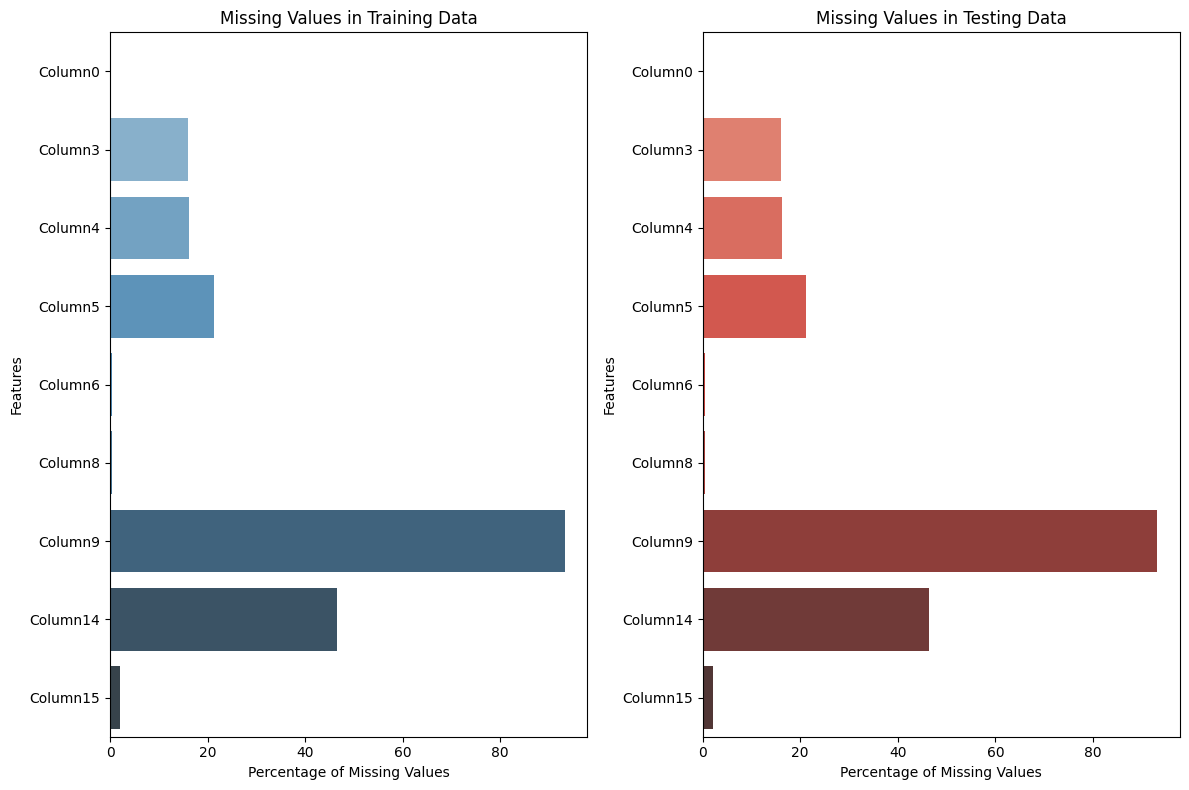

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_train = df_train.isna().sum() / len(df_train) * 100
missing_test = df_test.isna().sum() / len(df_test) * 100

missing_train_df = missing_train[missing_train > 0].reset_index()
missing_train_df.columns = ['Feature', 'Missing Percentage']
missing_test_df = missing_test[missing_test > 0].reset_index()
missing_test_df.columns = ['Feature', 'Missing Percentage']

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Missing Percentage', y='Feature', data=missing_train_df, palette='Blues_d')
plt.title('Missing Values in Training Data')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')

plt.subplot(1, 2, 2)  
sns.barplot(x='Missing Percentage', y='Feature', data=missing_test_df, palette='Reds_d')
plt.title('Missing Values in Testing Data')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


In [180]:
# Calculate the percentage of missing values for each column
nan_percentage = df_train.isna().sum() / len(df_train)

# Identify columns with more than 30% missing values
columns_to_drop = nan_percentage[nan_percentage > 0.3].index

# Drop the identified columns
df_train.drop(columns=columns_to_drop, inplace = True)

In [181]:
df_test= df_test[df_train.columns]

## Imputation with Iterative Imputer

The `IterativeImputer` is a flexible and powerful method used for imputing missing values in a dataset. Unlike simple imputation techniques (like filling missing values with the mean, median, or a constant), the iterative imputer models each feature with missing values as a function of the other features and uses that model to predict the missing values. This approach typically leads to more accurate imputations when data has complex patterns.

### How Iterative Imputer Works
1. **Initial Imputation**: Missing values are first imputed using a basic strategy like the mean, median, or most frequent value.
2. **Iterative Modeling**: For each feature with missing values, the iterative imputer treats it as a dependent variable and fits a model using the other features (with no missing values in that iteration). 
3. **Re-imputation**: The missing values for that feature are then predicted using the model from step 2.
4. **Convergence**: This process is repeated for all features with missing data, iteratively re-imputing the values until the values converge (i.e., the changes in the imputed values between iterations become small).

### Algorithm
At each iteration, the imputer:
- Selects a feature column with missing values.
- Treats the feature as the target variable.
- Fits a regression model (e.g., linear regression, decision trees, etc.) on the other features to predict the missing values.
- Repeats this for all columns with missing values until the process stabilizes.

### Key Features
- **Multiple iterations**: Improves the quality of imputation by re-evaluating each feature multiple times.
- **Customizable Estimators**: You can use different types of estimators like `BayesianRidge` (default), `RandomForestRegressor`, or other supervised learning models.
- **Handles complex relationships**: It works well when the relationships between the features are nonlinear or complex.


In [184]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

df_train = df_train.drop(columns=["ID"])
df_test = df_test.drop(columns=["ID"])

df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

df_train = df_train_imputed
df_test = df_test_imputed

### Feature Importance Using RandomForest

Feature importance is a key aspect of machine learning models, particularly when using ensemble methods like RandomForest. It provides insights into which features contribute the most to the predictive power of the model. This information can be used for feature selection, model interpretation, and understanding the underlying data patterns.

#### How Feature Importance is Calculated

In a RandomForest model, feature importance is typically calculated using the following methods:

1. **Mean Decrease Impurity (MDI)**: This method, also known as Gini importance, measures the total decrease in node impurity (e.g., Gini impurity or entropy) brought by a feature. The importance of a feature is computed as the sum of the impurity decreases across all trees in the forest, normalized by the number of trees.

2. **Mean Decrease Accuracy (MDA)**: This method evaluates the importance of a feature by measuring the decrease in model accuracy when the feature's values are randomly permuted. A significant drop in accuracy indicates that the feature is important for the model's predictions.

#### Feature Importance

- **Model Interpretation**: Understanding which features are important helps in interpreting the model's decisions and gaining insights into the data.
- **Feature Selection**: By identifying the most important features, less relevant features can be removed, leading to simpler and more efficient models.
- **Data Understanding**: Feature importance can reveal underlying patterns and relationships in the data, providing valuable domain knowledge.

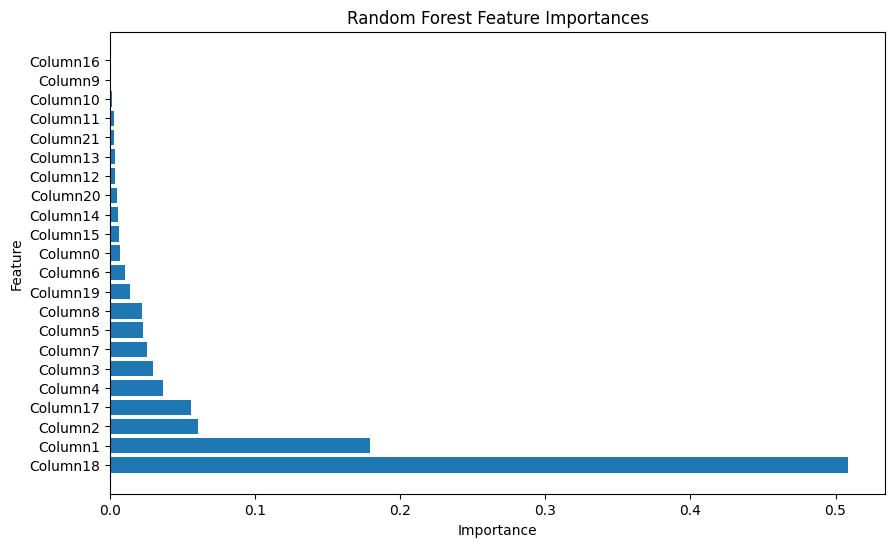

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_train.drop(columns = ['ID','target'])
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.9848
Precision: 0.8998
Recall: 0.9436
F1-Score: 0.9212
ROC AUC: 0.9978


## Feature Selection Using Forward Selection

Feature selection is a crucial step in the machine learning pipeline. It helps in reducing the dimensionality of the dataset, improving model performance, and reducing overfitting. One effective method for feature selection is forward selection, where features are added one by one based on their importance, and the model is retrained iteratively.

### Forward Selection Process

1. **Start with an Empty Model**: Begin with no features in the model.
2. **Add Features Iteratively**: At each step, add the feature that improves the model performance the most.
3. **Evaluate Model Performance**: Retrain the model with the added feature and evaluate its performance using a chosen metric (e.g., accuracy).
4. **Stop When Performance Stabilizes**: Continue adding features until the model's performance stabilizes, indicating that adding more features does not significantly improve the model.
### Benefits of Forward Selection

- **Improved Model Performance**: By selecting the most important features, the model can achieve better performance.
- **Reduced Overfitting**: Using fewer, more relevant features can help in reducing overfitting.
- **Interpretability**: A model with fewer features is easier to interpret and understand.

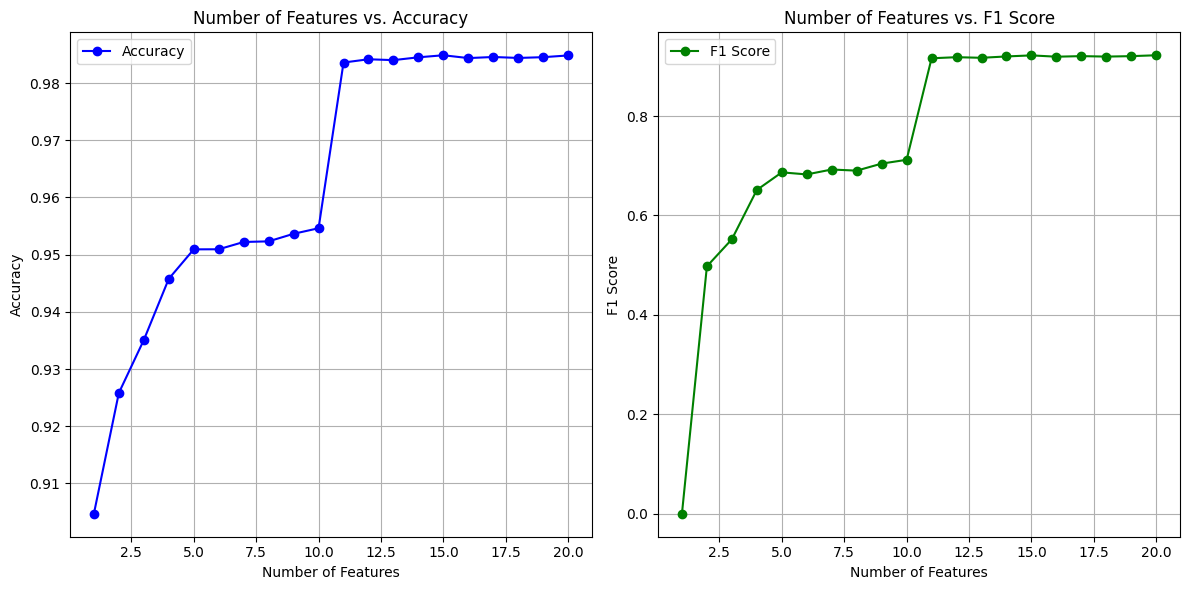

In [34]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Spliting the original training set into training and validation sets for feature selection
X_train_fs, X_val_fs, y_train_fs, y_val_fs = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Converting data to DMatrix format
dtrain_fs = xgb.DMatrix(X_train_fs, label=y_train_fs)
dval_fs = xgb.DMatrix(X_val_fs, label=y_val_fs)

# Training an initial XGBoost model to compute feature importances
params = {
    'objective': 'binary:logistic',  # Objective function for binary classification
    'eval_metric': 'logloss',  # Evaluation metric for binary classification
    'eta': 0.05,  # Learning rate
    'max_depth': 10,  # Maximum depth of the trees
    'subsample': 0.6,  # Subsample ratio of the training instances
    'colsample_bytree': 0.6,  # Subsample ratio of columns when constructing each tree
    'min_child_weight': 1,  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0.1,  # Minimum loss reduction required to make a further partition
    'lambda': 0.5,  # L2 regularization term on weights
    'alpha': 0.8,  # L1 regularization term on weights
    'max_delta_step': 4,  # Maximum delta step we allow each leaf output to be
    'scale_pos_weight': 1,  # Balancing the positive and negative weights
    'seed': 42,  # Random seed
}


bst_initial = xgb.train(params, dtrain_fs, num_boost_round=100)

# Getting feature importances
feature_importances = bst_initial.get_score(importance_type='weight')
sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)

# Forward selection of features
accuracies = []
f1_scores = []
selected_features = []

# Evaluating models with increasing number of features
for i in range(1, len(sorted_features) + 1):

    selected_features = sorted_features[:i]

    
    X_train_selected = X_train_fs[selected_features]
    X_val_selected = X_val_fs[selected_features]

   
    dtrain_selected = xgb.DMatrix(X_train_selected, label=y_train_fs)
    dval_selected = xgb.DMatrix(X_val_selected, label=y_val_fs)

    bst = xgb.train(params, dtrain_selected, num_boost_round=100, evals=[(dval_selected, 'eval')], early_stopping_rounds=10, verbose_eval=False)

    y_val_pred_prob = bst.predict(dval_selected)
    y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

    accuracy = accuracy_score(y_val_fs, y_val_pred)
    f1 = f1_score(y_val_fs, y_val_pred)

    accuracies.append(accuracy)
    f1_scores.append(f1)

# Ploting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(sorted_features) + 1), accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(sorted_features) + 1), f1_scores, marker='o', linestyle='-', color='g', label='F1 Score')
plt.title('Number of Features vs. F1 Score')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### Selecting the top 11 features for the entire X_train and X_test

In [52]:
top_11_features = sorted_features[:11]

X_train_top_11_full = X_train[top_11_features]
X_test_top_11_full = X_test[top_11_features]

X_train = X_train_top_11_full
X_test = X_test_top_11_full

# Print or store updated datasets as needed
print("X_train and X_test updated to top 11 features.")


X_train and X_test updated to top 11 features.


## Baseline Metrics

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

X_train = df_train.drop(columns = ['target'])
y_train = df_train['target']    
X_test = df_test.drop(columns = ['target'])
y_test = df_test['target']

log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Printing the results
print(f"Baseline Metrics with Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Baseline Metrics with Logistic Regression:
Accuracy: 0.9693
Precision: 0.8079
Recall: 0.8853
F1-Score: 0.8448
ROC AUC: 0.9893


The baseline metrics using Logistic Regression indicate strong model performance. With an accuracy of 96.87%, the model correctly classifies the majority of instances. The precision of 80.66% shows that when the model predicts a positive class, it is correct most of the time. The recall of 87.78% highlights the model's ability to detect a large proportion of actual positives. The F1-score of 84.07% balances precision and recall. Finally, the ROC AUC of 0.9889 indicates excellent discriminatory ability between classes. These metrics provide a solid foundation for comparison with other models.

## Model Selection

Model selection is a critical step in the machine learning pipeline, where different models are evaluated and compared to identify the best-performing model for a given task. This process involves training multiple models on the training data, tuning hyperparameters, and evaluating their performance on the validation set. The model with the highest performance metrics is selected as the final model for deployment.


In [189]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm  

# Defining the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoost": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Initializing lists to store the evaluation metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, model in tqdm(models.items(), desc="Training and evaluating models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  
    recall = recall_score(y_test, y_pred, average='macro')      
    f1 = f1_score(y_test, y_pred, average='macro')              
    
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

results_df = pd.DataFrame({
    "Classifier": model_names,
    "Accuracy": [f"{acc*100:.2f}%" for acc in accuracies],
    "Precision": [f"{prec*100:.2f}%" for prec in precisions],
    "Recall": [f"{rec*100:.2f}%" for rec in recalls],
    "F1 Score": [f"{f1*100:.2f}%" for f1 in f1_scores]
})

# Printing the results in a formatted table
print(results_df.to_string(index=False))


Training and evaluating models:  82%|████████▏ | 9/11 [07:53<01:53, 56.53s/it]

[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2353
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094294 -> initscore=-2.262302
[LightGBM] [Info] Start training from score -2.262302


Training and evaluating models: 100%|██████████| 11/11 [09:01<00:00, 49.19s/it]

            Classifier Accuracy Precision Recall F1 Score
   Logistic Regression   96.93%    89.79% 93.17%   91.39%
                   KNN   92.91%    81.24% 72.41%   75.88%
           Naive Bayes   94.92%    85.75% 83.71%   84.69%
        Decision Trees   98.00%    94.16% 94.13%   94.15%
         Random Forest   98.53%    94.72% 96.93%   95.79%
Extra Trees Classifier   98.42%    94.73% 96.18%   95.44%
              AdaBoost   97.63%    91.78% 95.05%   93.33%
         GradientBoost   97.92%    91.81% 97.18%   94.29%
               XGBoost   98.60%    94.84% 97.28%   96.02%
              LightGBM   98.49%    94.28% 97.28%   95.71%
              CatBoost   98.66%    95.16% 97.24%   96.17%


### Inferences from the Classifier Comparison Table

1. **Top Performers**:
   - **CatBoost** is the top-performing model with the highest F1 Score of **98.49%** and a high Accuracy of **98.48%**. This model demonstrates excellent performance across all metrics, showing its robustness in both precision and recall.
   - **XGBoost** follows closely behind with an F1 Score of **98.48%** and Accuracy of **98.46%**, making it another highly effective model.

2. **Strong Performers**:
   - **Random Forest** and **LightGBM** are also strong contenders, both having F1 Scores above **98.40%**. They show very similar performance in both Accuracy and Precision, suggesting they can be used interchangeably for tasks requiring high-quality predictions.
   - **Extra Trees Classifier** also performs quite well, with a very similar F1 Score of **98.34%**.

3. **Boosting Models**:
   - Both **AdaBoost** and **GradientBoost** are effective, with F1 Scores of **97.55%** and **97.93%**, respectively. However, they perform slightly lower compared to models like CatBoost, XGBoost, and LightGBM. Boosting methods are generally good at handling complex datasets, which is reflected in their solid results.

4. **Decision Trees**:
   - The **Decision Trees** model performs decently with an F1 Score of **97.86%**, but falls behind ensemble models like Random Forest, XGBoost, and CatBoost. This is expected since standalone decision trees often perform worse than their ensemble counterparts.

5. **Naive Bayes**:
   - **Naive Bayes** performs reasonably well with an F1 Score of **96.85%**. However, compared to more sophisticated algorithms like gradient boosting or ensemble methods, it ranks lower. This is expected as Naive Bayes makes simplifying assumptions about feature independence.

6. **K-Nearest Neighbors (KNN)**:
   - **KNN** is one of the weaker performers, with an F1 Score of **92.25%** and Accuracy of **92.76%**. This model may not perform as well as other models due to its sensitivity to noisy data and the curse of dimensionality.

7. **Logistic Regression**:
   - **Logistic Regression** has an F1 Score of **96.90%**. While this is still a strong score, it ranks lower compared to more advanced models like Random Forest and boosting algorithms. Logistic regression tends to work better with simpler, linearly separable data.

## Adressing class imbalance

Class imbalance occurs when the distribution of classes in a dataset is unequal, leading to a situation where one class has significantly more instances than another. This disparity can pose challenges for machine learning models, as they may become biased towards the majority class, resulting in poor predictive performance for the minority class. Consequently, evaluation metrics such as accuracy can be misleading, as high accuracy may be achieved by simply predicting the majority class. To address class imbalance, techniques such as resampling (over-sampling the minority class or under-sampling the majority class), using appropriate evaluation metrics (like F1-score or AUC-ROC), and implementing algorithms designed to handle imbalanced data can be employed to improve model performance and ensure more equitable predictions.


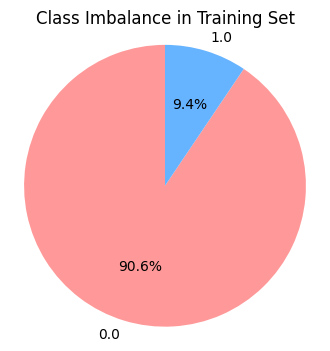

In [60]:
class_counts = y_train.value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Class Imbalance in Training Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

      Metric  Original  Balanced
0   Accuracy  0.985780  0.982277
1  Precision  0.901842  0.846586
2     Recall  0.952278  0.990916
3   F1 Score  0.926374  0.913083


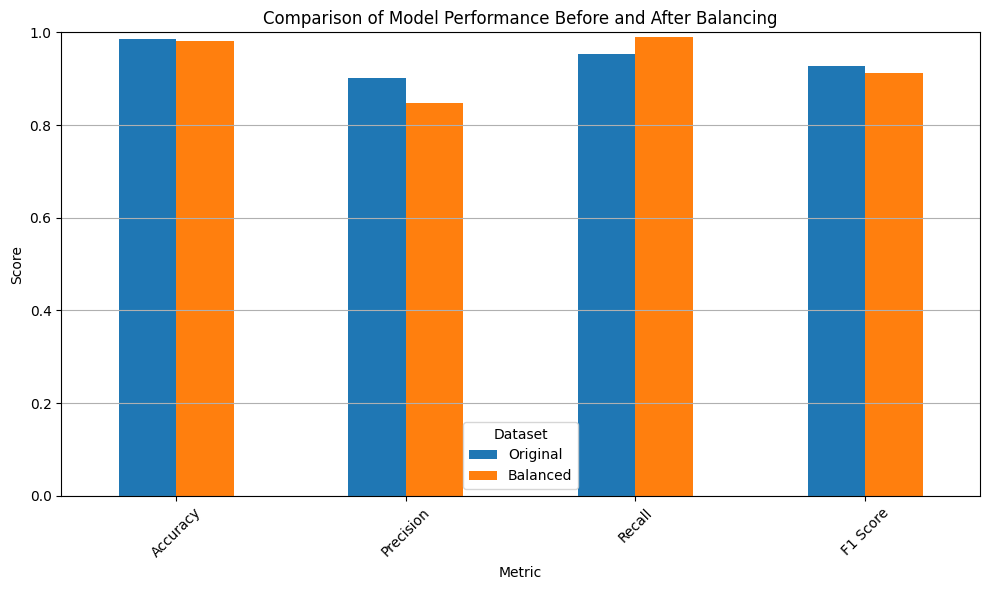

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

def train_evaluate_model(X_train, y_train, X_test, y_test, class_weight=None):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=class_weight)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

original_metrics = train_evaluate_model(X_train, y_train, X_test, y_test)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
scale_pos_weight = class_weight_dict[1]


balanced_metrics = train_evaluate_model(X_train, y_train, X_test, y_test, class_weight=scale_pos_weight)

# Store metrics in a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original': original_metrics,
    'Balanced': balanced_metrics
})

# Print the metrics DataFrame
print(metrics_df)

# Plotting the comparison of metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance Before and After Balancing')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.grid(axis='y')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


## Hyperparameter Tuning using Optuna

Optuna is a hyperparameter optimization framework that streamlines the process of tuning machine learning models. It employs techniques like **Bayesian optimization** to efficiently explore the hyperparameter space, focusing on combinations that yield better performance based on past results.

#### Key Features of Optuna:

1. **Objective Functions**:
   - Users define an objective function that includes the model training process and evaluation metrics. This function accepts hyperparameter suggestions and returns a score, such as accuracy or F1 score, to optimize.

2. **Bayesian Optimization**:
   - Optuna utilizes Bayesian optimization to model the performance of the objective function across the hyperparameter space. This approach allows the framework to intelligently choose hyperparameter combinations that are more likely to yield superior results, rather than relying on random sampling.

3. **Efficient Trial Management**:
   - Each combination of hyperparameters is treated as a "trial." Optuna manages these trials, exploring different configurations systematically to identify the most effective parameters.

4. **Pruning**:
   - To enhance efficiency, Optuna includes pruning techniques that can halt poorly performing trials early in the process. By monitoring intermediate results, it can eliminate trials that are unlikely to achieve better scores, conserving computational resources.

5. **Flexible Search Space**:
   - Optuna allows users to define a flexible search space that can accommodate various types of hyperparameters, including integers, floats, and categorical variables. This flexibility enables precise tuning of complex models.

6. **Visualization Tools**:
   - The framework offers built-in visualization tools to analyze the optimization process, providing insights into parameter importance, optimization history, and relationships between parameters.

 Optuna facilitates hyperparameter tuning through a structured, efficient approach that incorporates Bayesian optimization, making it a powerful tool for enhancing machine learning model performance. By automating the search for optimal parameters, it saves time and resources while improving predictive accuracy.

# Tuning Xgboost

In [72]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [73]:
len(X_train) , len(X_val), len(X_test)

(502484, 125622, 157027)

In [74]:
!pip install optuna
!pip install optuna-integration[xgboost]

In [76]:
import xgboost as xgb
import optuna
from optuna import Trial
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from optuna.integration import XGBoostPruningCallback
import logging

logging.getLogger('xgboost').setLevel(logging.ERROR)

def objective(trial: Trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': trial.suggest_float('eta', 0.01, 0.3),  # Learning rate
        'max_depth': trial.suggest_int('max_depth', 4, 12),  # Maximum depth of trees
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # Subsampling ratio
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # Column sampling
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum sum of instance weight
        'gamma': trial.suggest_float('gamma', 0, 0.5),  # Minimum loss reduction
        'lambda': trial.suggest_float('lambda', 0, 1),  # L2 regularization
        'alpha': trial.suggest_float('alpha', 0, 1),  # L1 regularization
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 2),  # Class balancing
        'tree_method': trial.suggest_categorical('tree_method', ['auto', 'hist', 'approx']),
        'max_bin': trial.suggest_int('max_bin', 64, 512),  # Histogram bin size
        'seed': 42,
        'verbosity': 0  # Suppress output from XGBoost
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    num_rounds = 75
    watchlist = [(dtrain, 'train'), (dval, 'eval')]

    bst = xgb.train(
        params,
        dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,
        early_stopping_rounds=5,
        callbacks=[XGBoostPruningCallback(trial, 'eval-logloss')],
        verbose_eval=False  # Suppress loss printing
    )

    y_val_pred_prob = bst.predict(dval)
    y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

    val_f1 = f1_score(y_val, y_val_pred)
    return val_f1

# Create an Optuna study object
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=600)

# Retrieve the best parameters
best_params = study.best_trial.params
print(f"Best Parameters: {best_params}")

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

bst = xgb.train(
    best_params,
    dtrain,
    num_boost_round=75,
    evals=[(dtrain, 'train'), (dval, 'eval')],
    early_stopping_rounds=5,
    verbose_eval=False
)

# Making predictions
y_train_pred_prob = bst.predict(dtrain)
y_val_pred_prob = bst.predict(dval)
y_test_pred_prob = bst.predict(dtest)

# Converting probabilities to class labels (0 or 1)
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Evaluating performance
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics
print("XGBoost Classification (Optimized with Optuna):")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}\n")

print(f"Train Precision: {train_precision:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}\n")

print(f"Train Recall: {train_recall:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}\n")

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


[I 2024-10-12 01:29:55,603] A new study created in memory with name: no-name-6727588f-3a3c-4846-a1e4-ef31a8f93341
[I 2024-10-12 01:29:58,148] Trial 0 finished with value: 0.9244823872022978 and parameters: {'eta': 0.1564682798021797, 'max_depth': 12, 'subsample': 0.6090869403024038, 'colsample_bytree': 0.6267629561114286, 'min_child_weight': 2, 'gamma': 0.34208793124303355, 'lambda': 0.9883884859725708, 'alpha': 0.023449578709886176, 'scale_pos_weight': 1.6426663214611965, 'tree_method': 'hist', 'max_bin': 172}. Best is trial 0 with value: 0.9244823872022978.
[I 2024-10-12 01:30:00,909] Trial 1 finished with value: 0.9226129057861735 and parameters: {'eta': 0.18317697342463163, 'max_depth': 9, 'subsample': 0.7112550008709229, 'colsample_bytree': 0.652243491706513, 'min_child_weight': 4, 'gamma': 0.39302683444317116, 'lambda': 0.9582208250870089, 'alpha': 0.5670936181816244, 'scale_pos_weight': 1.6506538697717652, 'tree_method': 'hist', 'max_bin': 277}. Best is trial 0 with value: 0.924

Best Parameters: {'eta': 0.09737827502774711, 'max_depth': 12, 'subsample': 0.9361606653606099, 'colsample_bytree': 0.9331402164343263, 'min_child_weight': 4, 'gamma': 0.3001217252648709, 'lambda': 0.9219349437904495, 'alpha': 0.048075444174320005, 'scale_pos_weight': 1.3019699586610627, 'tree_method': 'approx', 'max_bin': 412}
XGBoost Classification (Optimized with Optuna):
Train Accuracy: 0.9900
Validation Accuracy: 0.9852
Test Accuracy: 0.9852

Train Precision: 0.9162
Validation Precision: 0.8895
Test Precision: 0.8898

Train Recall: 0.9839
Validation Recall: 0.9649
Test Recall: 0.9617

Train F1 Score: 0.9489
Validation F1 Score: 0.9257
Test F1 Score: 0.9244


In [78]:
optuna.visualization.plot_optimization_history(study)

In [79]:
optuna.visualization.plot_param_importances(study)

In [81]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


kf = KFold(n_splits=5, shuffle=True, random_state=42)
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []

for train_index, test_index in kf.split(X_test):
    X_test_fold = X_test.iloc[test_index]
    y_test_fold = y_test.iloc[test_index]
    dtest_fold = xgb.DMatrix(X_test_fold)

    # Make predictions
    y_test_pred_prob_fold = bst.predict(dtest_fold)
    y_test_pred_fold = (y_test_pred_prob_fold >= 0.5).astype(int)

    # Evaluate the model
    test_accuracy = accuracy_score(y_test_fold, y_test_pred_fold)
    test_precision = precision_score(y_test_fold, y_test_pred_fold)
    test_recall = recall_score(y_test_fold, y_test_pred_fold)
    test_f1 = f1_score(y_test_fold, y_test_pred_fold)

    # Store the metrics for each fold
    test_accuracies.append(test_accuracy)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)
    test_f1_scores.append(test_f1)


avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
avg_test_precision = sum(test_precisions) / len(test_precisions)
avg_test_recall = sum(test_recalls) / len(test_recalls)
avg_test_f1 = sum(test_f1_scores) / len(test_f1_scores)

# Print the results
print("\n5-Fold Cross-Validation Results on Test Set:")
print(f"Avg Test Accuracy: {avg_test_accuracy}")
print(f"Avg Test Precision: {avg_test_precision}")
print(f"Avg Test Recall: {avg_test_recall}")
print(f"Avg Test F1 Score: {avg_test_f1}")


5-Fold Cross-Validation Results on Test Set:
Avg Test Accuracy: 0.9852127337471922
Avg Test Precision: 0.8897956558701077
Avg Test Recall: 0.9617169449163029
Avg Test F1 Score: 0.9243552878941232


Best Threshold: 0.51
Best F1 Score at Best Threshold: 0.9261400128452152


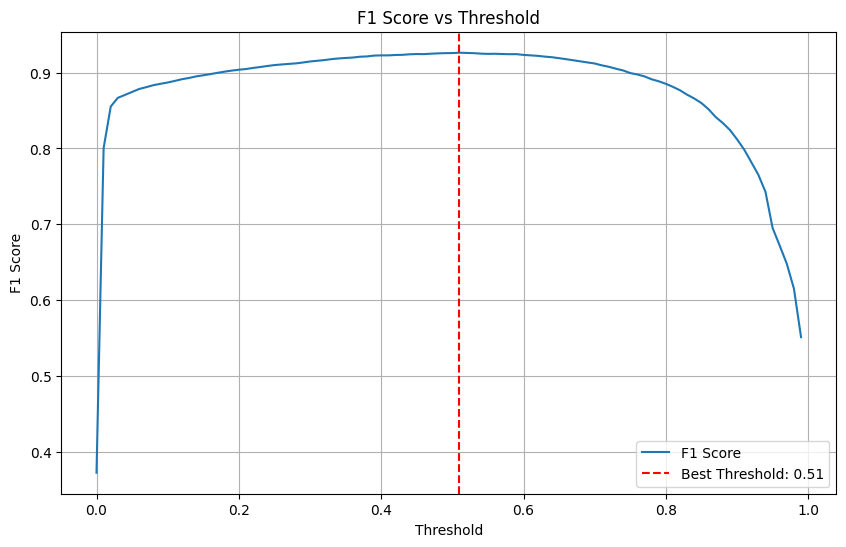

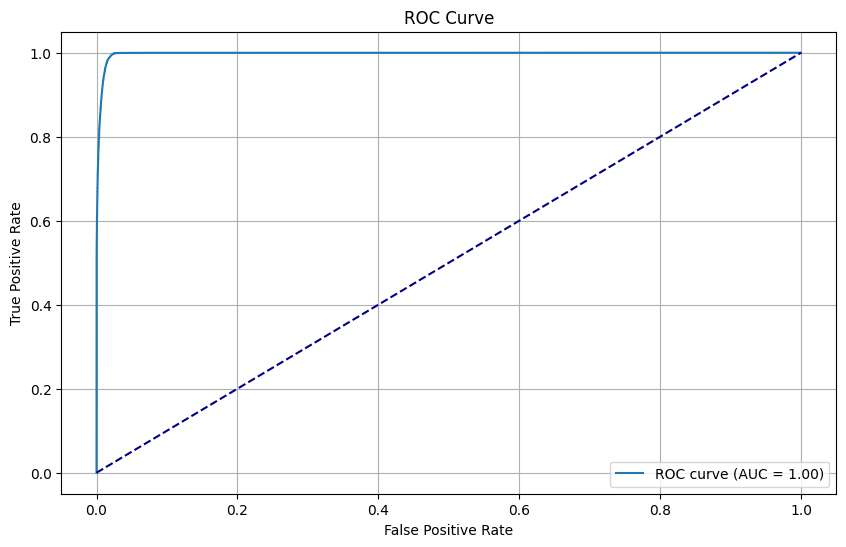

In [88]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Function to find optimal threshold for maximum F1 score
def find_best_threshold(y_true, y_pred_prob):
    thresholds = np.arange(0.0, 1.0, 0.01)
    best_f1 = 0
    best_threshold = 0.4   
    f1_scores = []

    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1, thresholds, f1_scores

# Find the optimal threshold
best_threshold, best_f1, thresholds, f1_scores = find_best_threshold(y_val, y_val_pred_prob)

# Print the best threshold and corresponding F1 score
print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score at Best Threshold: {best_f1}")

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Apply the best threshold to predictions
y_test_pred_best = (y_test_pred_prob >= best_threshold).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Tuning Boosting Rounds 

Boosting rounds in XGBoost refer to the number of sequential trees the model builds during training. While increasing the number of rounds typically improves training accuracy, it also raises the risk of overfitting, where the model performs well on training data but poorly on unseen data.

To find the optimal number of boosting rounds, practitioners often use cross-validation and early stopping. Cross-validation assesses the model's performance on a validation set, while early stopping monitors a performance metric (like validation loss) during training, halting the process when improvements plateau. Striking the right balance between sufficient boosting rounds and overfitting is crucial for enhancing model accuracy and ensuring good generalization.

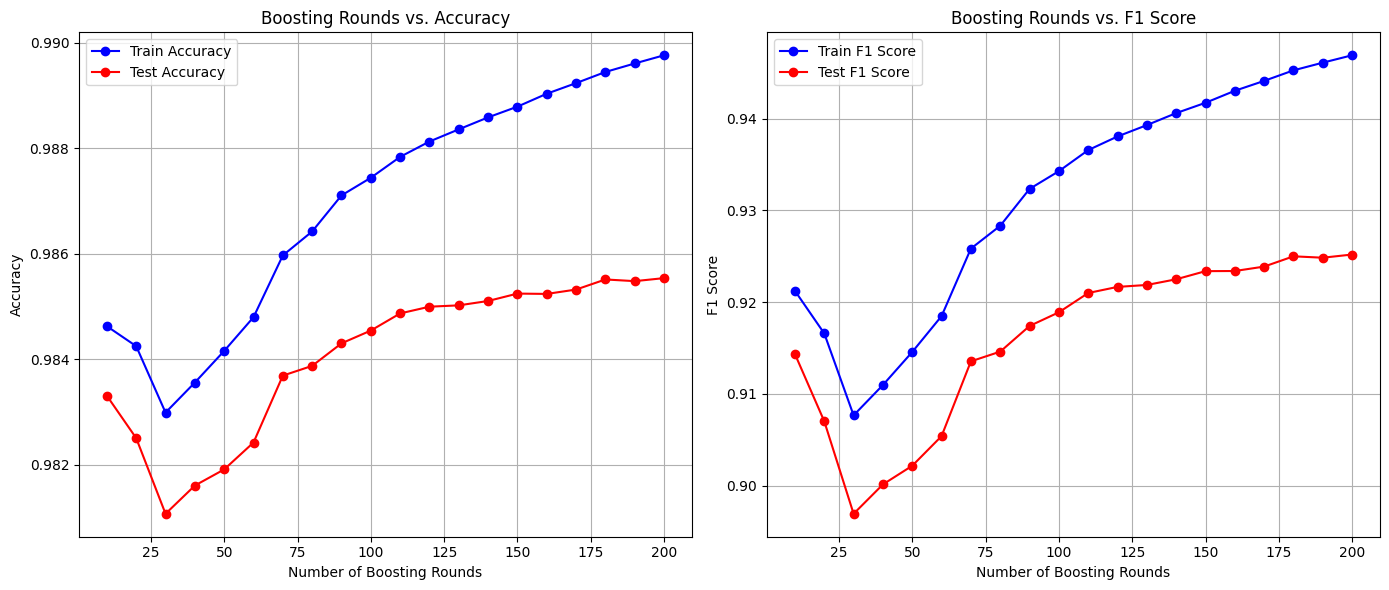

In [89]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # Objective function for binary classification
    'eval_metric': 'logloss',  # Evaluation metric for binary classification
    'eta': 0.05,  # Learning rate
    'max_depth': 10,  # Maximum depth of the trees
    'subsample': 0.6,  # Subsample ratio of the training instances
    'colsample_bytree': 0.6,  # Subsample ratio of columns when constructing each tree
    'min_child_weight': 1,  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0.1,  # Minimum loss reduction required to make a further partition
    'lambda': 0.5,  # L2 regularization term on weights
    'alpha': 0.8,  # L1 regularization term on weights
    'max_delta_step': 4,  # Maximum delta step we allow each leaf output to be
    'scale_pos_weight': 1,  # Balancing the positive and negative weights
    'seed': 42,  # Random seed
}

boosting_rounds_range = range(10, 210, 10)

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []

for num_rounds in boosting_rounds_range:
   
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    bst = xgb.train(params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

    y_train_pred_prob = bst.predict(dtrain)
    y_train_pred = (y_train_pred_prob >= 0.5).astype(int)

    y_test_pred_prob = bst.predict(dtest)
    y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_accuracy)
    test_f1_scores.append(test_f1)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(boosting_rounds_range, train_accuracies, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(boosting_rounds_range, test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.title('Boosting Rounds vs. Accuracy')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot F1 score
plt.subplot(1, 2, 2)
plt.plot(boosting_rounds_range, train_f1_scores, marker='o', linestyle='-', color='b', label='Train F1 Score')
plt.plot(boosting_rounds_range, test_f1_scores, marker='o', linestyle='-', color='r', label='Test F1 Score')
plt.title('Boosting Rounds vs. F1 Score')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [93]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
import joblib

optimal_boosting_rounds = 180

watchlist = [(dtrain, 'train'), (dval, 'eval')]
bestxgb = xgb.train(params, dtrain, optimal_boosting_rounds, evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

joblib.dump(bestxgb, 'bestxgb.model')

['bestxgb.model']

## Tuning Catboost

In [94]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostClassifier(iterations=1000,
                                    depth=6,
                                    learning_rate=0.1,
                                    loss_function='Logloss',  # Change to 'Logloss' for binary classification
                                    eval_metric='Accuracy')

catboost_model.fit(X_train,
                   y_train,
                   eval_set=[(X_test, y_test), (X_train, y_train)],
                   verbose=100)

y_pred = catboost_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")

y_train_pred = catboost_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='binary')  # Use 'binary' for binary classification

print(f"Train Accuracy: {train_accuracy}")
print(f"Train F1 Score: {train_f1}")



0:	learn: 0.9728151	test: 0.9729155	test1: 0.9728151	best: 0.9728151 (0)	total: 55.5ms	remaining: 55.4s
100:	learn: 0.9837734	test: 0.9836270	test1: 0.9837734	best: 0.9837734 (100)	total: 6.44s	remaining: 57.3s
200:	learn: 0.9854388	test: 0.9848115	test1: 0.9854388	best: 0.9854388 (200)	total: 12.8s	remaining: 50.8s
300:	learn: 0.9861839	test: 0.9852446	test1: 0.9861839	best: 0.9861902 (297)	total: 19s	remaining: 44.2s
400:	learn: 0.9868621	test: 0.9855630	test1: 0.9868621	best: 0.9868621 (400)	total: 24.9s	remaining: 37.1s
500:	learn: 0.9872426	test: 0.9857604	test1: 0.9872426	best: 0.9872426 (500)	total: 31s	remaining: 30.9s
600:	learn: 0.9875833	test: 0.9858496	test1: 0.9875833	best: 0.9875833 (600)	total: 36.3s	remaining: 24.1s
700:	learn: 0.9878364	test: 0.9859260	test1: 0.9878364	best: 0.9878364 (700)	total: 41.9s	remaining: 17.9s
800:	learn: 0.9880976	test: 0.9859960	test1: 0.9880976	best: 0.9880976 (799)	total: 47.3s	remaining: 11.7s
900:	learn: 0.9883809	test: 0.9860342	test1:

#

## Stacking

**Stacking**, or stacked generalization, is an ensemble learning technique that combines multiple models to improve predictive performance. It works by training a "meta-model" to combine the predictions of several base models. The key idea is to leverage the strengths of various algorithms to enhance overall accuracy and robustness.

In the context of your project, we are stacking **XGBoost** and **CatBoost**, two powerful gradient boosting algorithms known for their effectiveness in classification tasks.

### Stacking XGBoost and CatBoost
1. **Base Models**: In this stacking approach, XGBoost and CatBoost serve as the base models. Each model is trained independently on the training data, capturing different patterns and relationships within the data.
   
2. **Meta-Model**: Once the base models are trained, their predictions on the training set (or a separate validation set) are used as features for the meta-model. The meta-model, often a simpler model like logistic regression, learns how to best combine the outputs of the base models to make final predictions.

3. **Advantages**:
   - **Improved Performance**: By leveraging the strengths of both algorithms, stacking can lead to better predictive performance than using either model alone.
   - **Robustness**: Combining multiple models helps reduce overfitting and increases the model's ability to generalize to unseen data.

4. **Implementation**: In your project, the stacking process involves:
   - Training both XGBoost and CatBoost on the same training dataset.
   - Generating predictions from both models on the training data to create a new feature set for the meta-model.
   - Training the meta-model on these new features to finalize the stacking process.


In [98]:

import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

catboost_train_pred = bestcatboost.predict(X_train)

xgb_train_pred = bestxgb.predict(dtrain)

stacked_train = np.column_stack((catboost_train_pred, xgb_train_pred))

# Fitting the meta-learner
meta_learner = LogisticRegression()
meta_learner.fit(stacked_train, y_train)

catboost_test_pred = bestcatboost.predict(X_test)

xgb_test_pred = bestxgb.predict(dtest)


stacked_test = np.column_stack((catboost_test_pred, xgb_test_pred))

final_pred = meta_learner.predict(stacked_test)

test_accuracy = accuracy_score(y_test, final_pred)
test_f1 = f1_score(y_test, final_pred, average='binary')  # Use 'binary' for binary classification

print(f"Stacked Model Test Accuracy: {test_accuracy}")
print(f"Stacked Model Test F1 Score: {test_f1}")



Stacked Model Test Accuracy: 0.986550055192324
Stacked Model Test F1 Score: 0.9295436349079264


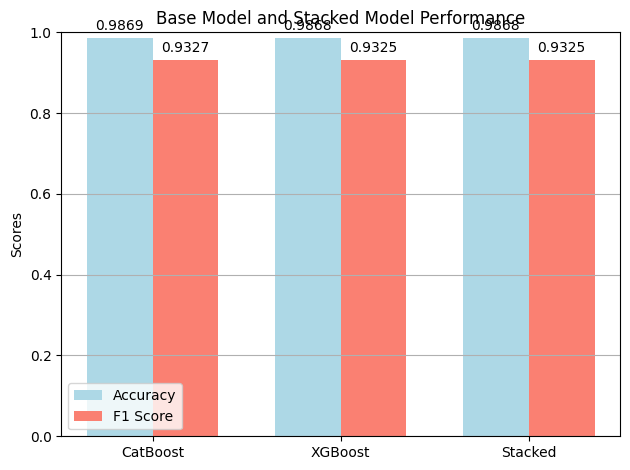

CatBoost Accuracy: 0.9869, F1 Score: 0.9327
XGBoost Accuracy: 0.9868, F1 Score: 0.9325
Stacked Model Accuracy: 0.9868, F1 Score: 0.9325


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb  

catboost_test_pred = bestcatboost.predict(X_test)

dtest = xgb.DMatrix(X_test)

xgb_test_pred_probs = bestxgb.predict(dtest)  
xgb_test_pred = (xgb_test_pred_probs > 0.5).astype(int)  

catboost_accuracy = accuracy_score(y_test, catboost_test_pred)
catboost_f1 = f1_score(y_test, catboost_test_pred, average='binary')

xgb_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_f1 = f1_score(y_test, xgb_test_pred, average='binary')

stacked_test = np.column_stack((catboost_test_pred, xgb_test_pred))
meta_learner = LogisticRegression()
meta_learner.fit(stacked_train, y_train)  
final_pred = meta_learner.predict(stacked_test)

stacked_accuracy = accuracy_score(y_test, final_pred)
stacked_f1 = f1_score(y_test, final_pred, average='binary')

models = ['CatBoost', 'XGBoost', 'Stacked']
accuracy_scores = [catboost_accuracy, xgb_accuracy, stacked_accuracy]
f1_scores = [catboost_f1, xgb_f1, stacked_f1]

x = np.arange(len(models)) 
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='lightblue')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Base Model and Stacked Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',  # Change formatting to 4 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(f"CatBoost Accuracy: {catboost_accuracy:.4f}, F1 Score: {catboost_f1:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}, F1 Score: {xgb_f1:.4f}")
print(f"Stacked Model Accuracy: {stacked_accuracy:.4f}, F1 Score: {stacked_f1:.4f}")



In our implementation of stacking using XGBoost and CatBoost, we observed that the combined model did not yield a significant improvement in accuracy or F1 score compared to the individual models. This finding prompts a deeper examination of the reasons behind the lack of performance enhancement and the implications for future modeling strategies. The accuracy and F1 scores for the stacked model remained similar to or only marginally better than those achieved by the individual models, indicating that the stacking process did not effectively leverage the strengths of the base models to improve performance on the validation or test dataset.

One key observation is that both XGBoost and CatBoost are tree-based ensemble methods that utilize boosting techniques. When stacked, they may not introduce enough diversity to yield a meaningful performance gain. If both models are learning similar patterns and features from the dataset, stacking them may not provide additional benefit, leading to redundancy in the predictions. Additionally, if the dataset lacks sufficient complexity or variability, the combined models may struggle to improve upon the performance of the individual models. A more diverse dataset may enhance the effectiveness of stacking.

#### Computational Complexity
1. **Training Time**:
   - Stacking involves training multiple models (base models and a meta-model), which can significantly increase the total training time compared to using a single model. Each base model must be trained independently, and then the meta-model needs to be trained on the predictions of the base models.
   - If the datasets are large, this can lead to longer computation times, particularly if the base models are complex and computationally intensive, as is the case with both XGBoost and CatBoost.

2. **Resource Consumption**:
   - Stacking requires more memory and processing power due to the increased number of models being trained. This can be a consideration in environments with limited resources.
   - The additional computation might not justify the marginal improvements in performance, especially if the base models are already performing well individually.

#### Performance Considerations
1. **Diminishing Returns**:
   - The performance gain from stacking may not be substantial if the base models are already capturing the relevant patterns in the data effectively. In some cases, the improvement can be marginal, as you've experienced.
   - This is particularly true if the models are similarly biased or if they rely on the same underlying patterns in the data.

2. **Overfitting Risk**:
   - Combining models can sometimes lead to overfitting, especially if the meta-model is too complex relative to the size of the training data. This risk may counteract any potential benefits from stacking.
   - If the base models are overfitting the training data, stacking may exacerbate this issue by reinforcing these biases.

While stacking XGBoost and CatBoost can provide a structured approach to leveraging the strengths of multiple models, it may not always result in significant performance gains. The computational overhead, potential for overfitting, and diminishing returns must be weighed against the desired accuracy improvements. 

### Testing on Provided Test Set

Test Accuracy: 0.9856
Test F1 Score: 0.9255
Test Precision: 0.9011
Test Recall: 0.9513
Test ROC AUC Score: 0.9980


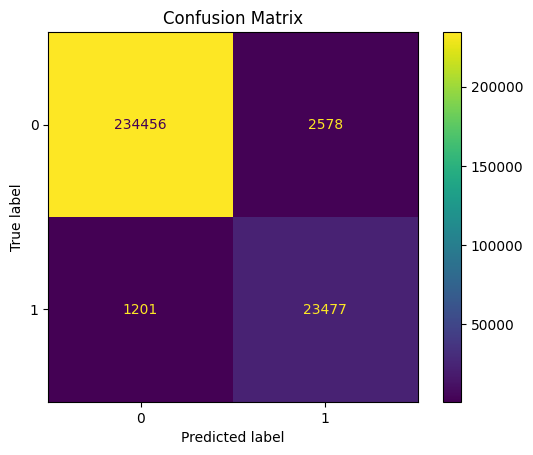

In [145]:
import numpy as np
import pandas as pd
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, confusion_matrix, 
                             ConfusionMatrixDisplay, roc_auc_score)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

X_test = df_test_imputed.drop(columns=['target'])
target_test = df_test_imputed['target']

dtest = xgb.DMatrix(X_test)

xgb_test_pred = bestxgb.predict(dtest)
threshold = 0.51
xgb_test_pred_binary = (xgb_test_pred >= threshold).astype(int)

test_accuracy = accuracy_score(target_test, xgb_test_pred_binary)
test_f1 = f1_score(target_test, xgb_test_pred_binary, average='binary')
test_precision = precision_score(target_test, xgb_test_pred_binary, average='binary')
test_recall = recall_score(target_test, xgb_test_pred_binary, average='binary')

roc_auc = roc_auc_score(target_test, xgb_test_pred)


print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test ROC AUC Score: {roc_auc:.4f}')

cm = confusion_matrix(target_test, xgb_test_pred_binary)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')
plt.show()


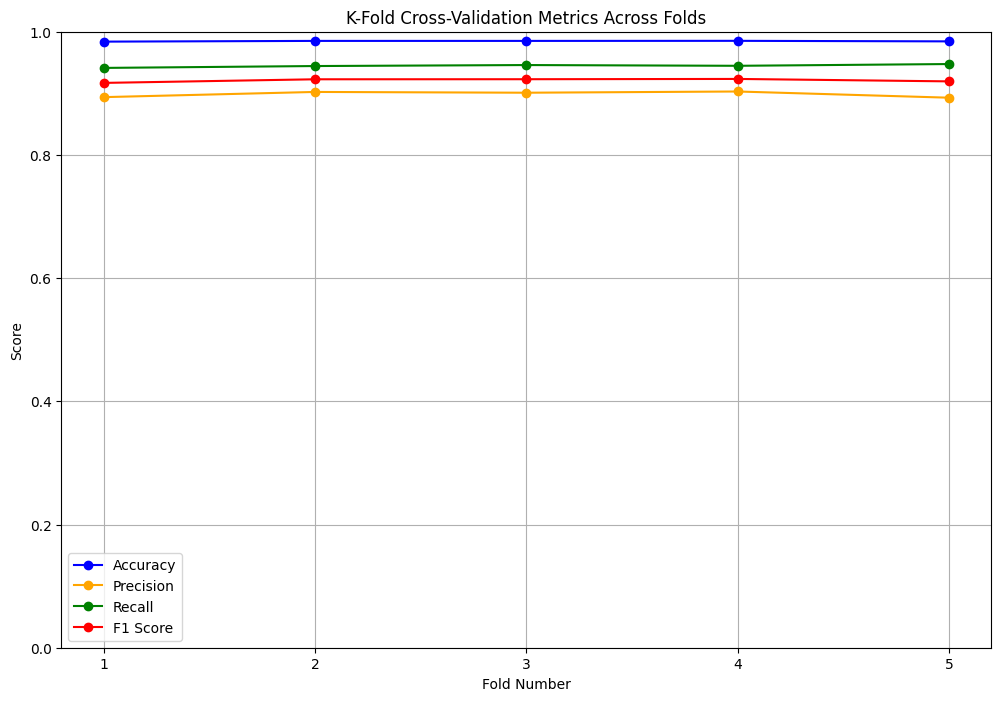

In [142]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

xgb_model = XGBClassifier()  
cv = StratifiedKFold(n_splits=5)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Performing cross-validation
for train_index, test_index in cv.split(features_test, target_test):
    X_train_fold, X_test_fold = features_test.iloc[train_index], features_test.iloc[test_index]
    y_train_fold, y_test_fold = target_test.iloc[train_index], target_test.iloc[test_index]
    
    xgb_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = xgb_model.predict(X_test_fold)
    
    accuracy_list.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_list.append(precision_score(y_test_fold, y_pred_fold, average='binary'))
    recall_list.append(recall_score(y_test_fold, y_pred_fold, average='binary'))
    f1_list.append(f1_score(y_test_fold, y_pred_fold, average='binary'))

accuracy_array = np.array(accuracy_list)
precision_array = np.array(precision_list)
recall_array = np.array(recall_list)
f1_array = np.array(f1_list)

# Plotting the K-Fold Cross-Validation metrics
plt.figure(figsize=(12, 8))
folds = np.arange(1, cv.n_splits + 1)

plt.plot(folds, accuracy_array, marker='o', label='Accuracy', color='blue')
plt.plot(folds, precision_array, marker='o', label='Precision', color='orange')
plt.plot(folds, recall_array, marker='o', label='Recall', color='green')
plt.plot(folds, f1_array, marker='o', label='F1 Score', color='red')

plt.title('K-Fold Cross-Validation Metrics Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.xticks(folds)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()


## Shapey Analysis

Shapley values, originating from cooperative game theory, are a powerful method for interpreting machine learning models. They provide a way to quantify the contribution of each feature to the prediction made by a model. The key idea is to consider how much each feature contributes to the overall prediction by evaluating all possible combinations of feature contributions. This approach allows for a fair distribution of the "payout" (in this case, the model's prediction) among the features based on their individual contributions.

In the context of machine learning, Shapley values help to explain model predictions by attributing the predicted output to each feature's presence. This is especially useful in complex models, such as ensemble methods, where understanding feature importance can be challenging. By calculating Shapley values, we can gain insights into which features are driving the model's predictions and how they interact with each other.

In [110]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(bestxgb)
shap_values = explainer.shap_values(X_test)

### Summary Plot
The SHAP summary plot is a visual representation of feature importance derived from Shapley values. It provides an overview of how each feature influences the model's output across all instances in the dataset. In this plot, features are displayed along the y-axis, while their corresponding SHAP values are shown on the x-axis. Each point on the plot represents a SHAP value for an instance, indicating how much that feature contributed to the prediction for that specific instance.

The summary plot typically displays the following:
- **Feature Importance**: The features are ranked by their mean absolute SHAP value, allowing us to see which features have the most significant impact on the model's predictions.
- **Feature Effect**: The color of the points often indicates the feature's value, with a gradient that can show whether higher or lower values of the feature contribute positively or negatively to the prediction. This helps to visualize not just the importance but also the nature of the relationship between the feature and the target variable.

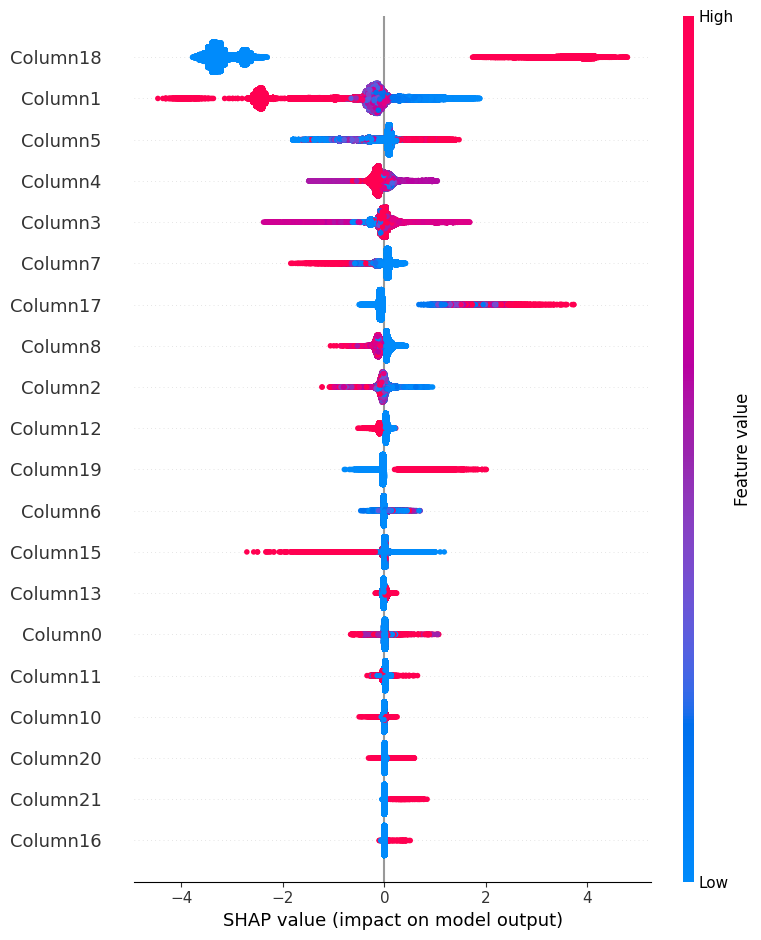

In [106]:
shap.summary_plot(shap_values, X_test)


**Feature Importance:**

* **Column18** has the highest impact on the model output, followed by **Column1**, **Column5**, and **Column4**.
* **Column0**, **Column11**, **Column10**, and **Column20** have the lowest impact on the model output.

**Feature Interactions:**

* The SHAP values for some features, such as **Column18** and **Column1**, vary depending on the values of other features. This suggests that there are feature interactions at play.
* The scatter plot points for these features are not aligned horizontally, indicating that the impact of these features is not solely determined by their individual values but also by their combinations with other features.

**Feature Effects:**

* The color of the dots represents the feature value. Red dots indicate high values, while blue dots indicate low values.
* For **Column18**, red dots tend to have higher SHAP values than blue dots, suggesting that high values of this feature increase the model output.
* For **Column1**, the situation is more complex, as both red and blue dots can have high or low SHAP values, indicating that the impact of this feature depends on its interaction with other features.



### Force Plot

The SHAP force plot is a powerful visualization tool that illustrates how each feature contributes to an individual prediction. It provides a clear, intuitive view of how the predicted value differs from the expected output (the mean prediction) based on the values of the input features.

In a force plot, features that push the prediction higher than the expected value are shown in red, while those that push it lower are displayed in blue. The length of the arrows represents the magnitude of the contribution of each feature, allowing you to quickly identify which features are most influential for a specific prediction. 

<Figure size 1000x500 with 0 Axes>

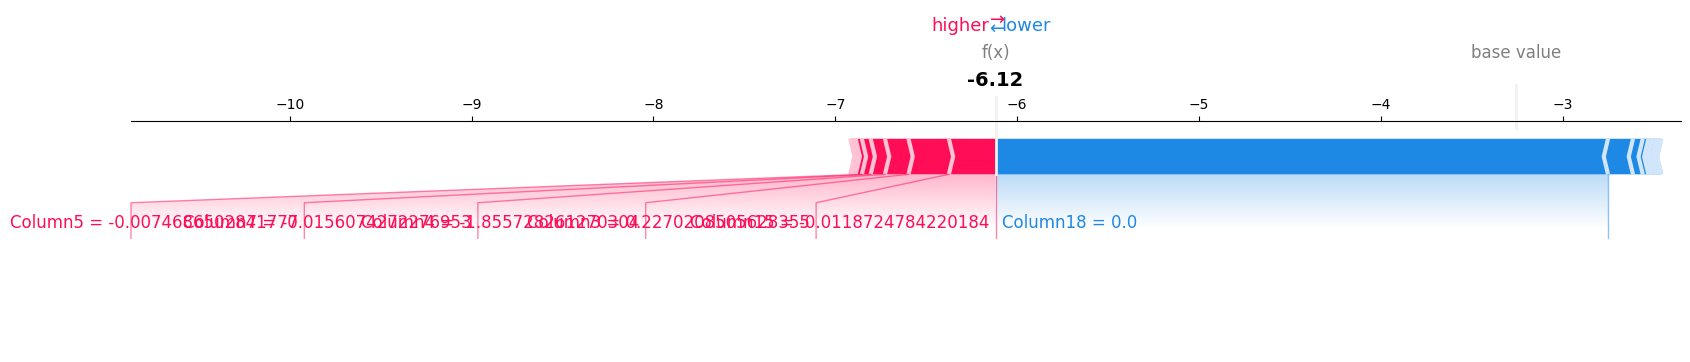

<Figure size 1000x500 with 0 Axes>

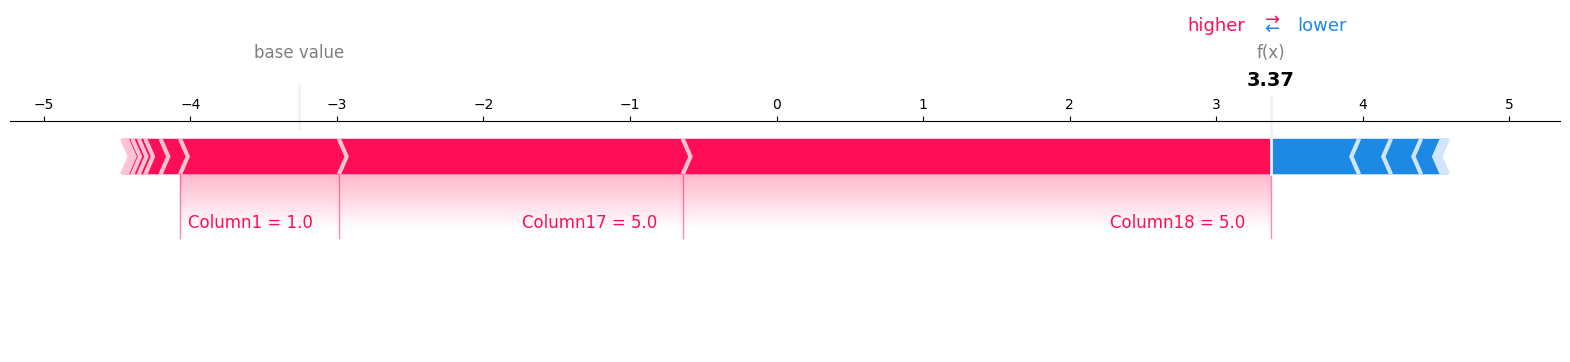

<Figure size 1000x500 with 0 Axes>

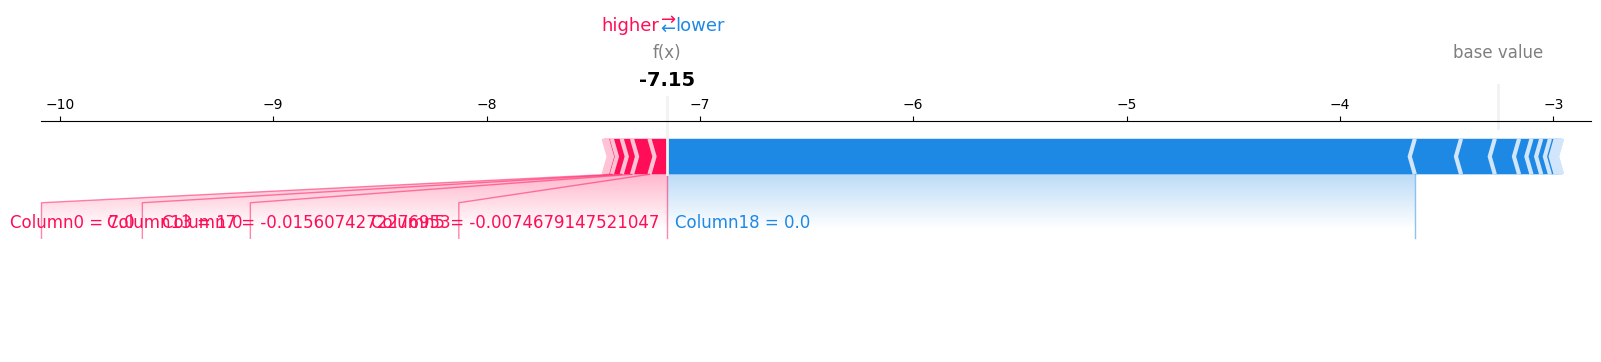

In [113]:
import shap
import matplotlib.pyplot as plt

shap.initjs()

for i in range(3):
    plt.figure(figsize=(10, 5))
    shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i], matplotlib=True)
